In [1]:
import numpy as np
import pandas as pd
from speedboot import speedboot

##### You are given a random sample of size n from a population

In [2]:
n = 200
n_sample = pd.DataFrame({"age": np.random.normal(50,10,n),
                         "height": np.random.normal(1.7,.2,n),
                         "weight": np.random.normal(65,10,n)})
n_sample.head()

,age,height,weight
0,49.470004,1.472036,67.730991
1,59.848742,2.031273,79.097077
2,61.308271,1.568898,72.128535
3,55.170230,1.665424,60.033013
4,30.037233,1.716990,66.447617


##### Using this sample you wish to estimate the mean age and mean BMI for the population form which we are sampling

In [3]:
def estimators(X):
    '''Estimators for the mean age and mean BMI of a population'''
    return np.array([np.mean(X['age']), np.mean(X['weight']/X['height']**2)])

(age_hat, bmi_hat) = estimators(n_sample)

print(f'estimated mean age is {age_hat:.2f}')
print(f'estimated mean BMI is {bmi_hat:.2f}')

estimated mean age is 50.30
estimated mean BMI is 23.77


##### Instanciate speedboot with the sample and the estimator function

In [4]:
speedboot_object = speedboot(data=n_sample, stats_fun=estimators)

##### Run the bootstrap with 999 iterations

In [5]:
speedboot_object.fit(R=999, bar=True, seed=123)

100%|██████████| 999/999 [00:00<00:00, 1733.25it/s]


##### Parallelize computations for speed

In [6]:
speedboot_object.fit(R=999, bar=True, par=True, seed=123)

100%|██████████| 999/999 [00:01<00:00, 685.46it/s]


##### Recover point estimates

In [7]:
speedboot_object.ests

array([50.30266133, 23.76757062])

##### Recover bootstrap estimates stored in .ests_boot

In [8]:
pd.DataFrame(speedboot_object.ests_boot, columns=['age_hats', 'BMI_hats'])

,age_hats,BMI_hats
0,50.582540,23.685718
1,50.885977,23.399666
2,49.446647,24.410150
3,49.261338,22.964006
4,49.879855,23.417152
...,...,...
994,50.324540,25.262719
995,50.694060,23.187396
996,49.681328,23.704914
997,50.498463,24.956430


##### Plot histograms for normality check

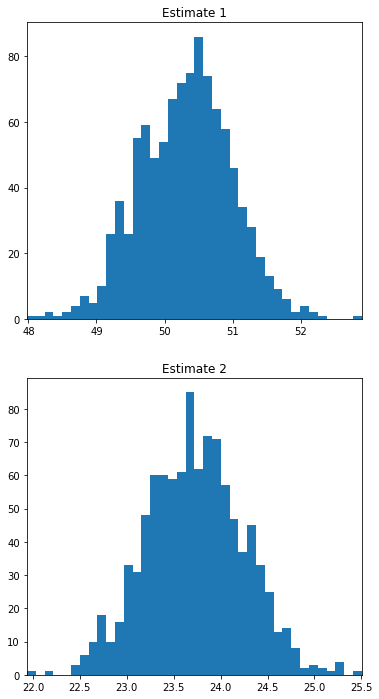

In [9]:
speedboot_object.plot(prec=.04, size=6)

##### Compute 90% percentile confidence intervals

In [10]:
speedboot_object.per_ci(alpha=.05)

array([[49.05934582, 51.60412076],
       [22.72160438, 24.71054636]])

##### Compute 90% empirical confidence intervals

In [11]:
speedboot_object.emp_ci(alpha=.05)

array([[49.00120189, 51.54597684],
       [22.82459488, 24.81353687]])

##### To compute BCa confidence intervals, you need to run the jackknife first

In [12]:
speedboot_object.jackknife(bar=True, par=True)

100%|██████████| 200/200 [00:00<00:00, 1854.76it/s]


##### Compute 90% BCa confidence intervals

In [13]:
speedboot_object.bca_ci(alpha=.05)

array([[48.90530843, 51.51055348],
       [22.77175805, 24.79140501]])